In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
img = cv2.imread('102061.png', cv2.IMREAD_GRAYSCALE)


In [2]:

# FFT and shift
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)


In [19]:

# Create a high-pass mask
rows, cols = img.shape

print(f"Number of rows : {rows}\nNumber of columns : {cols} \n" )

crow, ccol = rows // 2 , cols // 2
mask = np.ones((rows, cols), np.uint8)

r = 10  # radius of low-frequency region to suppress
cv2.circle(mask, (ccol, crow), r, 0, -1)




Number of rows : 481
Number of columns : 321 



array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [20]:
for x in mask:
    print(*x, sep=" ")


1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [21]:
# Apply mask
fshift_filtered = fshift * mask



In [22]:
# Inverse FFT
f_ishift = np.fft.ifftshift(fshift_filtered)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


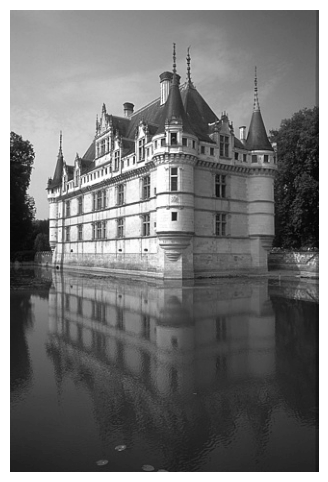

In [23]:

# Plot results
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()



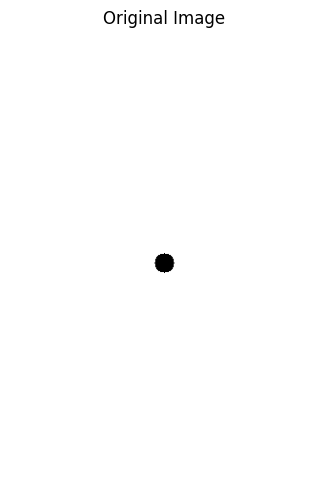

In [24]:
plt.figure(figsize=(12, 6))
plt.title('Original Image')
plt.axis('off')
plt.imshow(mask, cmap='gray')
plt.show()



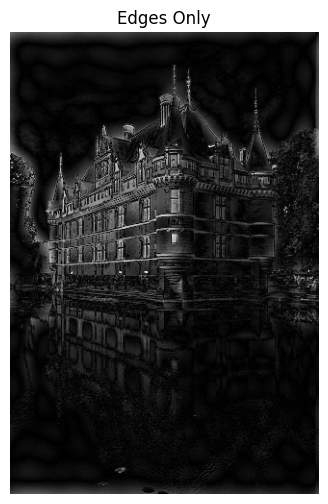

In [25]:
plt.figure(figsize=(12, 6))
plt.title('High-pass Mask')
plt.axis('off')
plt.imshow(img_back, cmap='gray')
plt.title('Edges Only')
plt.axis('off')
plt.show()